## Imports

In [65]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob
import pandas as pd

## Read Data from Drive

In [68]:
accuracy_images = []
loss_images = []
for image_path in glob.glob("*.jpg"):
    image = (list([image_path, cv2.imread(image_path)]))
    if 'Accuracy' in image[0]:
        accuracy_images.append(image)
    if 'Loss' in image[0]:
        loss_images.append(image)
    
text_files = []
for text_file_path in glob.glob("*.csv"):
    text_files.append(pd.read_csv(text_file_path, delimiter=','))

## Plot Accuracies and Losses

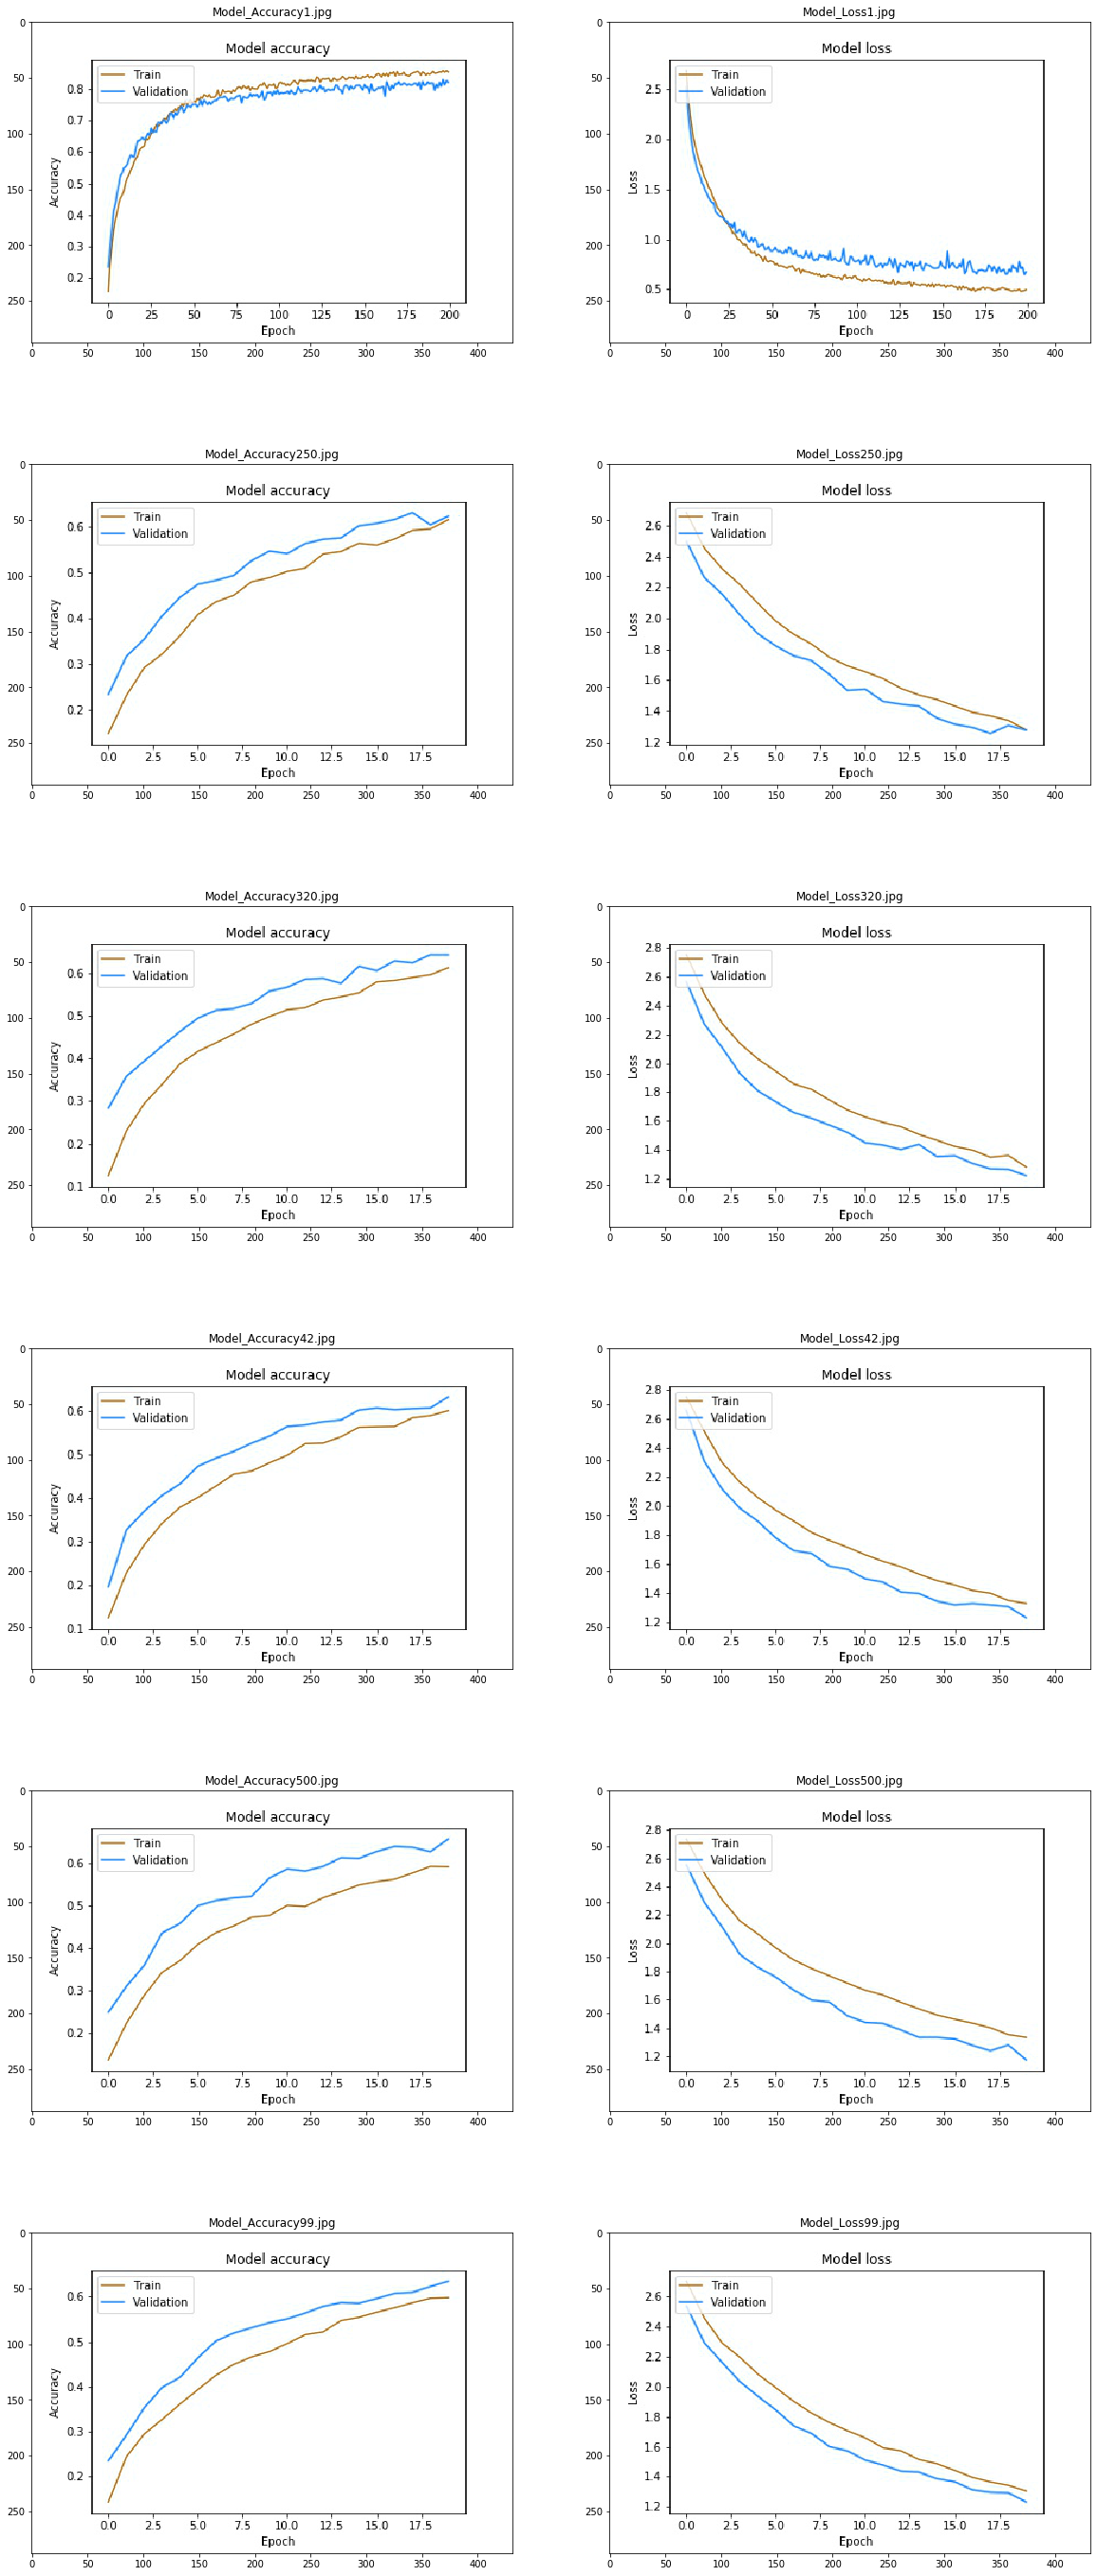

In [69]:
fig = plt.gcf()
fig.set_size_inches(20, 50)
for i, (a_image, l_image) in enumerate(zip(accuracy_images, loss_images)):
    plt.subplot(len(accuracy_images), 2, i*2+1)
    plt.title(a_image[0])
    plt.imshow(a_image[1])
    plt.subplot(len(accuracy_images), 2, i*2+2)
    plt.title(l_image[0])
    plt.imshow(l_image[1])
# fig.savefig('all_accuracies_and_losses.png', dpi=500)

## Analyze the Accuracies

- Calculate accuracies after 20 iterations
- Calculate mean accuracy
- Define best model

In [126]:
final_accuracies = []
for data in text_files[1:]:
    final_accuracies.append(data['val_accuracy'][19])
print('Final accuracies:      ', np.round(final_accuracies,5))
print('\n'+'\033[1m'+'Comparison of the different Models'+'\033[0m')
print('Variance:              ', np.round(np.var(final_accuracies),7))
print('Standard deviation:    ', np.round(np.std(final_accuracies),7))

Final accuracies:       [0.62302 0.64236 0.63194 0.65724 0.63492]

Comparison of the different Models
Variance:               0.000132
Standard deviation:     0.0114882


In [127]:
mean_accuracies = []
for data in text_files[1:]:
    mean_accuracies.append(np.mean(data['val_accuracy']))
print('Mean accuracies:       ', np.round(mean_accuracies,5))
print('\n'+'\033[1m'+'Comparison of the different Models'+'\033[0m')
print('Variance:              ', np.round(np.var(mean_accuracies),7))
print('Standard deviation:    ', np.round(np.std(mean_accuracies),7))

Mean accuracies:        [0.51116 0.53023 0.51032 0.53043 0.5099 ]

Comparison of the different Models
Variance:               9.5e-05
Standard deviation:     0.0097451


In [128]:
best_acc = np.amax(final_accuracies)
best_model = np.argmax(final_accuracies)
print('\033[1m'+'The Best Model is Number', best_model, 'with', 
      np.round(best_acc*100,3), '% Validation Accuracy.'+'\033[0m')
for i, f_acc in enumerate(final_accuracies):
    if f_acc != best_acc:
        print('Model', i, 'was', np.round((best_acc-f_acc)*100,3) , '% worse than Model', best_model)

The Best Model is Number 3 with 65.724 % Validation Accuracy.
Model 0 was 3.423 % worse than Model 3
Model 1 was 1.488 % worse than Model 3
Model 2 was 2.53 % worse than Model 3
Model 4 was 2.232 % worse than Model 3
